In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_excel("Q1_data.xlsx", sheet_name='data')
# print(data)
years = data.Year
data_B = np.array(data.B)

# Scale values for both A and B to have roughly same magnitude of value (order of 10^1), ensuring neither A nor B has an outsized impact on the combined outcome.
data_B = data_B

# Constants for Dataset
START_YEAR = 2002
MOST_RECENT_YEAR = 2023
NUM_YEARS = 22

# Other Constants
N = 1000

In [3]:
# Define a weighting function (e.g., linear decay)
def weight_function(t, decay_rate=0.1):
    return np.exp(-decay_rate * t)

# Estimate Probability Density Function
def estimate_pdf(data_points):
    weights = weight_function(np.arange(len(data_points)))
    weights /= weights.sum()
    # Perform kernel density estimation
    kde = gaussian_kde(data_points,weights=weights)
    # Plot the original data and the estimated PDF
    # x_values = np.linspace(min(data_points), max(data_points), 1000)
    # plt.hist(data_points, bins=30, density=True, alpha=0.5, label='Histogram')
    # plt.plot(x_values, kde(x_values), label='Kernel Density Estimation')
    # plt.title('Kernel Density Estimation')
    # plt.xlabel('X')
    # plt.ylabel('Probability Density')
    # plt.legend()
    # plt.show()
    return kde

In [4]:
# Predict values for the next 50 years and add them
for i in np.arange(1,50+1):
    curr_year = MOST_RECENT_YEAR+i # this year would correspond to an index of year - START_YEAR, since START_YEAR is the zero point.
    prev_year = curr_year-START_YEAR-1
    years = np.append(years, curr_year)
    # Compute probability density functions and perform Monte Carlo Simulation

    # For Variable B
    kde_B = estimate_pdf(data_B) # Generate probability distribution
    kde_B_samples = kde_B.resample(size=N) # Sample from the pdf
    
    # Compute Adjustment Factor by comparing how the samples deviate from the previous year's value
    compare_to_prev_year = kde_B_samples - data_B[prev_year]


    # Randomly sample a value from the distribution and add the adjustment factor.
    data_B = np.append(data_B, np.mean(kde_B_samples))

In [1]:
# Predict values for the next 50 years and add them
for i in np.arange(1,50+1):
    curr_year = MOST_RECENT_YEAR+i # this year would correspond to an index of year - START_YEAR, since START_YEAR is the zero point.
    prev_year = curr_year-START_YEAR-1
    years = np.append(years, curr_year)
    # Compute probability density functions and perform Monte Carlo Simulation

    # For Variable B
    kde_B = estimate_pdf(data_B) # Generate probability distribution
    kde_B_samples = kde_B.resample(size=N) # Sample from the pdf
    
    # Compute Adjustment Factor by comparing how the samples deviate from the previous year's value
    compare_to_prev_year = kde_B_samples - data_B[prev_year]

    # Find the mean deviation from the previous year's value. If the value is negative, we will subtract our adjustment factor. If positive, add it.
    multiplier = 0.1
    if (np.mean(compare_to_prev_year) < 0):
        multiplier = -0.1
    adjustment_factor = np.sqrt(np.sqrt(np.sum(np.square(compare_to_prev_year))) / compare_to_prev_year.shape[0])
    adjustment_factor = adjustment_factor*multiplier

    # Randomly sample a value from the distribution and add the adjustment factor.
    curr_year_B = kde_B.resample(1) + adjustment_factor
    data_B = np.append(data_B, curr_year_B)

NameError: name 'np' is not defined

Text(0, 0.5, 'New Houses Built')

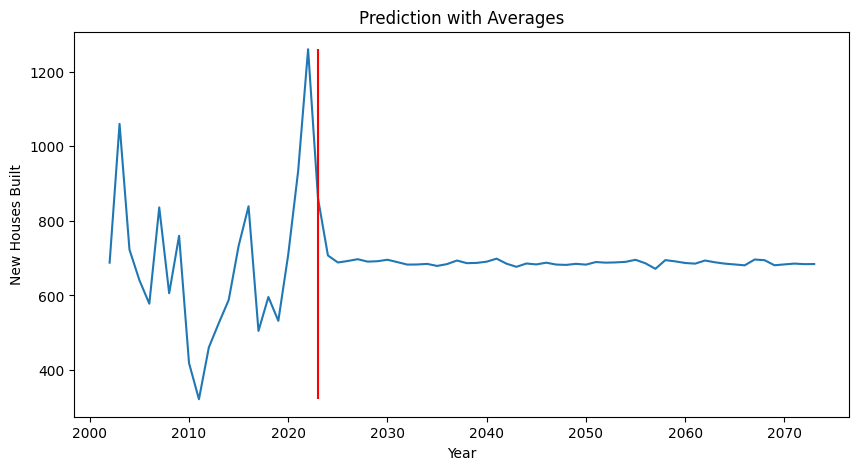

In [8]:
plt.figure(figsize=(10,5))
plt.plot(years,data_B)
plt.vlines(2023, np.min(data_B), np.max(data_B), colors='red')
plt.title("Prediction with Averages")
plt.xlabel("Year")
plt.ylabel("New Houses Built")